Letter 和 area 的网络架构差不多一样，但是province的模型就要复杂一点，因为文字可能更加难以识别相对于字幕和数字来说

In [6]:
import tensorflow as tf
import tensorflow.keras.layers
import pandas as pd
from keras.utils.np_utils import to_categorical
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [7]:
data_train_set_letter=pd.read_csv('./train_data_letter_sparse.csv').values
x_letter_train=np.reshape(preprocessing.normalize(data_train_set_letter[:,0:-1], norm="l1"),(-1,20,20,1))
y_letter_train=to_categorical(data_train_set_letter[:,-1].astype("int64"),34)




In [8]:
data_train_set_letter.shape

(10539, 401)

In [18]:
def model_letter2():
  model= tf.keras.models.Sequential()
  # model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(34))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [19]:
model_letter =model_letter2()
model_letter.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history_letter=model_letter.fit(
  x_letter_train,y_letter_train,
  batch_size=128,
  epochs=200,
  validation_split=0.2,
  validation_freq=1,
  
)

======] - 0s 2ms/step - loss: 2.1655 - accuracy: 0.4854 - val_loss: 2.1236 - val_accuracy: 0.5384
Epoch 29/200
66/66 [==============================] - 0s 2ms/step - loss: 2.1119 - accuracy: 0.5052 - val_loss: 2.0699 - val_accuracy: 0.5546
Epoch 30/200
66/66 [==============================] - 0s 2ms/step - loss: 2.0638 - accuracy: 0.5187 - val_loss: 2.0185 - val_accuracy: 0.5716
Epoch 31/200
66/66 [==============================] - 0s 2ms/step - loss: 2.0181 - accuracy: 0.5296 - val_loss: 1.9673 - val_accuracy: 0.5792
Epoch 32/200
66/66 [==============================] - 0s 2ms/step - loss: 1.9720 - accuracy: 0.5473 - val_loss: 1.9173 - val_accuracy: 0.5863
Epoch 33/200
66/66 [==============================] - 0s 2ms/step - loss: 1.9227 - accuracy: 0.5541 - val_loss: 1.8692 - val_accuracy: 0.5977
Epoch 34/200
66/66 [==============================] - 0s 2ms/step - loss: 1.8827 - accuracy: 0.5634 - val_loss: 1.8214 - val_accuracy: 0.5977
Epoch 35/200
66/66 [==============================

KeyboardInterrupt: 

In [11]:
data_test_set_letter=pd.read_csv('./test_data_letter_sparse.csv').values
x_letter_test=np.reshape(
    preprocessing.normalize(data_test_set_letter[:,0:-1], norm="l1")
    ,(-1,20,20,1))
y_letter_test=to_categorical(data_test_set_letter[:,-1].astype("int64"))
data_test_set_letter.shape

(2634, 401)

In [12]:
model_letter.evaluate(x_letter_test,y_letter_test)

83/83 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9829


[0.08594339340925217, 0.9829156994819641]

In [13]:
model_letter.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 34)                54434     
_________________________________________________________________
activation (Activation)      (None, 34)                0         
Total params: 54,594
Trainable params: 54,594
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'CNN modle of Letter')

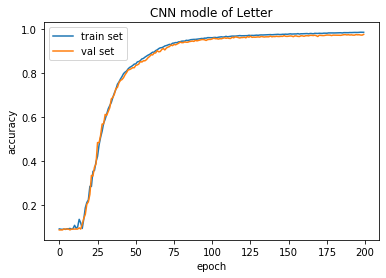

In [37]:
plt.plot(history_letter.history['accuracy'],label="train set")
plt.plot(history_letter.history['val_accuracy'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN modle of Letter")

Text(0.5, 1.0, 'CNN modle of Letter')

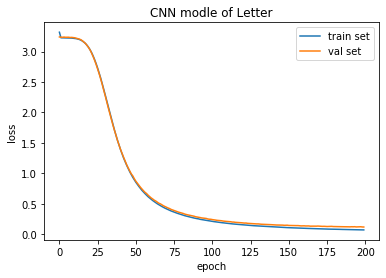

In [38]:
plt.plot(history_letter.history['loss'],label="train set")
plt.plot(history_letter.history['val_loss'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN modle of Letter")

Area


In [39]:
data_train_set_area=pd.read_csv('./train_data_area_sparse.csv').values
x_area_train=np.reshape(preprocessing.normalize(data_train_set_area[:,0:-1], norm="l1"),(-1,20,20,1))
y_area_train=to_categorical(data_train_set_area[:,-1])
data_train_set_area.shape

(5369, 401)

In [40]:
def model_area_model():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(26))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [41]:
data_train_set_area.shape

(5369, 401)

In [42]:
model_area =model_area_model()
model_area.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history_area=model_area.fit(
  x_area_train,y_area_train,
  batch_size=32,
  epochs=200,
  validation_split=0.2,
  validation_freq=1,
  
)

969 - val_accuracy: 0.9572
Epoch 63/200
135/135 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9669 - val_loss: 0.1918 - val_accuracy: 0.9618
Epoch 64/200
135/135 [==============================] - 0s 3ms/step - loss: 0.1741 - accuracy: 0.9707 - val_loss: 0.1848 - val_accuracy: 0.9628
Epoch 65/200
135/135 [==============================] - 0s 3ms/step - loss: 0.1705 - accuracy: 0.9683 - val_loss: 0.1805 - val_accuracy: 0.9646
Epoch 66/200
135/135 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.9700 - val_loss: 0.1763 - val_accuracy: 0.9646
Epoch 67/200
135/135 [==============================] - 0s 3ms/step - loss: 0.1607 - accuracy: 0.9716 - val_loss: 0.1727 - val_accuracy: 0.9609
Epoch 68/200
135/135 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 0.9704 - val_loss: 0.1683 - val_accuracy: 0.9665
Epoch 69/200
135/135 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.9735 - val_l

In [43]:
data_test_set_area=pd.read_csv('./test_data_area_sparse.csv').values
x_area_test=np.reshape(preprocessing.normalize(data_test_set_area[:,0:-1], norm="l1"),(-1,20,20,1))
y_area_test=to_categorical(data_test_set_area[:,-1].astype("int64"))
data_test_set_area.shape

(1342, 401)

In [44]:
model_area.evaluate(x_area_test,y_area_test)

42/42 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9806


[0.07105845957994461, 0.9806259274482727]

In [45]:
model_area.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 20, 20, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 26)                41626     
_________________________________________________________________
activation_5 (Activation)    (None, 26)                0         
Total params: 41,786
Trainable params: 41,786
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'CNN modle of Area')

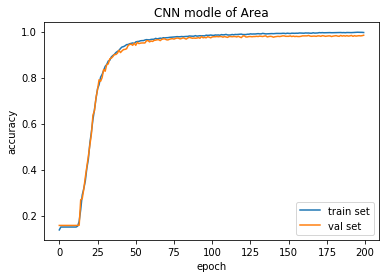

In [46]:
plt.plot(history_area.history['accuracy'],label="train set")
plt.plot(history_area.history['val_accuracy'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN modle of Area")

Text(0.5, 1.0, 'CNN modle of Area')

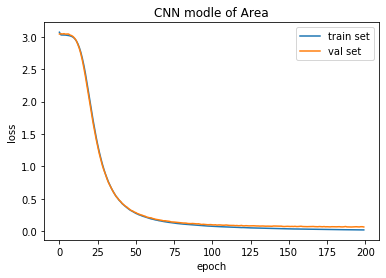

In [47]:
plt.plot(history_area.history['loss'],label="train set")
plt.plot(history_area.history['val_loss'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN modle of Area")

Province

In [48]:
data_train_set_province=pd.read_csv('./train_data_province_sparse.csv').values
x_province_train=np.reshape(preprocessing.normalize(data_train_set_province[:,0:-1], norm="l1"),(-1,20,20,1))
y_province_train=to_categorical(data_train_set_province[:,-1])
data_train_set_province.shape

(2222, 401)

In [49]:
y_province_train.shape

(2222, 31)

In [50]:
def model_province_model():
  model= tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(31))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [51]:
model_province =model_province_model()
model_province.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history_province=model_province.fit(
  x_province_train,y_province_train,
  batch_size=128,
  epochs=500,
  validation_split=0.2,
  validation_freq=50,
  
)

====] - 2s 145ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 309/500
14/14 [==============================] - 2s 147ms/step - loss: 0.0254 - accuracy: 0.9910
Epoch 310/500
14/14 [==============================] - 2s 136ms/step - loss: 0.0254 - accuracy: 0.9932
Epoch 311/500
14/14 [==============================] - 2s 135ms/step - loss: 0.0194 - accuracy: 0.9961
Epoch 312/500
14/14 [==============================] - 2s 145ms/step - loss: 0.0210 - accuracy: 0.9910
Epoch 313/500
14/14 [==============================] - 2s 148ms/step - loss: 0.0228 - accuracy: 0.9916
Epoch 314/500
14/14 [==============================] - 2s 145ms/step - loss: 0.0188 - accuracy: 0.9955
Epoch 315/500
14/14 [==============================] - 2s 131ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 316/500
14/14 [==============================] - 2s 131ms/step - loss: 0.0246 - accuracy: 0.9904
Epoch 317/500
14/14 [==============================] - 2s 133ms/step - loss: 0.0225 - accuracy: 0.9944
Epoch 318/500
14/

In [52]:
data_test_set_province=pd.read_csv('./test_data_province_sparse.csv').values
x_province_test=np.reshape(preprocessing.normalize(data_test_set_province[:,0:-1], norm="l1"),(-1,20,20,1))
y_province_test=to_categorical(data_test_set_province[:,-1].astype("int64"))
data_test_set_province.shape

(555, 401)

In [53]:
model_province.evaluate(x_province_test,y_province_test)

18/18 [==============================] - 0s 11ms/step - loss: 1.0474 - accuracy: 0.8667


[1.0474296808242798, 0.8666666746139526]

In [54]:
model_province.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 20, 20, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               3277056   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

Text(0.5, 1.0, 'CNN modle of Area')

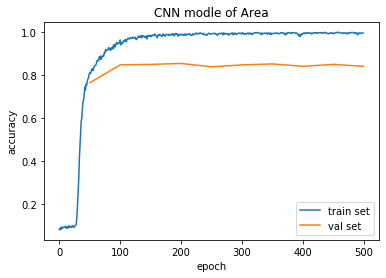

In [55]:
plt.plot(history_province.history['accuracy'],label="train set")
plt.plot([50,100,150,200,250,300,350,400,450,500],history_province.history['val_accuracy'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN modle of Area")

Text(0.5, 1.0, 'CNN modle of Area')

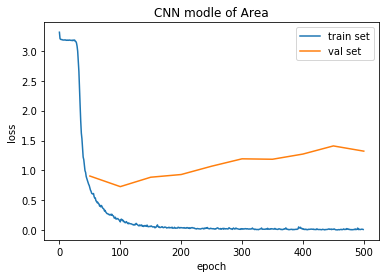

In [56]:
plt.plot(history_province.history['loss'],label="train set")
plt.plot([50,100,150,200,250,300,350,400,450,500],history_province.history['val_loss'],label="val set")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("CNN modle of Area")